<font color='black'><font size="4">Le plan de ce notebook pour projet 2 est le suivant:</font></font>
<font color='black'><font size="3"> <ul>
<li>Lire les fichiers csv et les présenter sous forme de DataFrames </li>
<li>Nettoyer les DataFrames des valeurs NaNs et les duplicants</li>
<li>Choisir des critéres pour l'analyse de données et les présenter sous formes des DataFrames--appelé DataFrames de critère</li>
<li>Nettoyer les DataFrames de critère des valeurs NaNs</li> 
<li>Calculer la moyen, median et écart-type de ces DataFrames de critère</li>
<li>Analyse des données de chaque DataFrame de critère avec une conclusion</li>
   <li>Conclusion générale</li>
</ul>   </font></font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
pl.rcParams.update({'font.size': 16})
import sys
!{sys.executable} -m pip install numpy

In [2]:
### version 
pd.__version__

'1.0.5'

In [3]:
### lire les fichire et les présenter sous formes des dataframes
def lire_csv(nomfichier):
    df = pd.read_csv(nomfichier, sep=',')
    df = df[df.columns[:-1]] ## dans le csv on remarque que chaque ligne termine par une virgule ce qui crée un colonne vide a la fin
    return df
df_CountrySeries = lire_csv('EdStatsCountry-Series.csv')
df_Country = lire_csv('EdStatsCountry.csv')
df_Data = lire_csv('EdStatsData.csv')
df_FootNote = lire_csv('EdStatsFootNote.csv')
df_Series = lire_csv('EdStatsSeries.csv')

<font color='darkblue'><font size="3">La fonction (function_nan) ci dessous comporte deux points: 
compter 1) tous les valeurs de Nan (par **isna().sum()**), 2) les valeurs duplicants (df.duplicated) 

Pour résoudre ces problèmes: 1) calculer le rapport qui est valeurs Nan d'une colonne diviser par la taille du colonne. 
Ensuite si le rapport est plus grande que 90% (0.9) on supprime la colonne entièrement.
Pour 2) on cherche les valeurs duplicants en gardant juste la premièr valeur.</font></font>

In [4]:
def function_nan(nomDataFrame):
    count_T = 0 
    liste = [] ## on conserve dedans les colonnes qui ont des NaN (sous condition)
    somme_duplicants = nomDataFrame.duplicated(keep='first').sum()
    nomDataFrame = nomDataFrame.drop_duplicates()
    for i in np.arange(1,len(nomDataFrame.columns)):
        count = nomDataFrame[nomDataFrame.columns[i]].isna().sum() ## we count the sum of the Nan values in each column
        n = len(nomDataFrame)
        rapport = float(count)/float(n) ## pour calculer le rapport entre valeur non NaN et valeur en total
        if rapport >= 0.9: ## condition si les NaN sont 90% du valeur total donc on supprime le colonne
            liste.append(nomDataFrame.columns[i])
        count_T = count_T + count  
    return nomDataFrame.drop(columns=liste) , count_T, somme_duplicants 

df_CountrySeries_clean, nbre_CountrySeries, S1 = function_nan(df_CountrySeries)
df_Country_clean, nbre_Country, S2 = function_nan(df_Country)
df_Data_clean, nbre_Data, S3 = function_nan(df_Data)  
df_FootNote_clean, nbre_FootNote, S4 = function_nan(df_FootNote)
df_Series_clean, nbre_Series, S5 = function_nan(df_Series)

<font color='darkblue'><font size="3">Dans ce qui suit on trace un tableau avec les valeurs des NaN, duplicants et les lignes/colonnes des dataframe du forme:
    
lignes avant cleaning || colonnes avant cleaning || valeurs NaN || valeurs duplicants || lignes après cleaning || colonnes après cleaning</font></font>

In [5]:
df_CountrySeries_var=[len(df_CountrySeries.index),len(df_CountrySeries.columns),nbre_CountrySeries, S1,len(df_CountrySeries_clean.index),len(df_CountrySeries_clean.columns)]
df_Country_var=[len(df_Country.index),len(df_Country.columns),nbre_Country, S2,len(df_Country_clean.index),len(df_Country_clean.columns)]
df_Data_var=[len(df_Data.index),len(df_Data.columns),nbre_Data, S1,len(df_Data_clean.index),len(df_Data_clean.columns)]
df_FootNote_var=[len(df_FootNote.index),len(df_FootNote.columns),nbre_FootNote, S1,len(df_FootNote_clean.index),len(df_FootNote.columns)]
df_Series_var=[len(df_Series.index),len(df_Series.columns),nbre_Series, S1,len(df_Series_clean.index),len(df_Series_clean.columns)]

valeurs = np.array([df_CountrySeries_var, df_Country_var, df_Data_var, df_FootNote_var,df_Series_var])
df_Tableau = pd.DataFrame(data = valeurs, 
                        columns=['lignes avant', 'colonnes avant', 'valeurs \'NaN\'', 'valeurs duplicants', 'lignes clean', 'colonnes clean'], 
                        index=['DataFrame-CountrySeries','DataFrame-Country','DataFrame-Data','DataFrame-FootNote','DataFrame-Series'])
df_Tableau

,lignes avant,colonnes avant,valeurs 'NaN',valeurs duplicants,lignes clean,colonnes clean
DataFrame-CountrySeries,613,3,0,0,613,3
DataFrame-Country,241,31,2113,0,241,31
DataFrame-Data,886930,69,52568249,0,886930,25
DataFrame-FootNote,643638,4,0,0,643638,4
DataFrame-Series,3665,20,51538,0,3665,7


<font color='darkblue'><font size="3">Criteria que j'ai choisi pour l'analyse des données:
    
1. Inscription aux classes secondaire et à l'université (niveau bac+1 à bac+8)   
2. Possession des computers personel  
3. L'accés au Internet   
4. Le GDP de chaque habitants    
5. Population des ages est un critére utilisé avec une des critère précédent -- on verra dans section B)   
6. L'évolution du population
    </font></font>


In [6]:
np_Indicator_Name = df_Data_clean['Indicator Name'].unique()
df_Indicator_Name = pd.DataFrame(np_Indicator_Name, columns = ['Indicator Name'])
df_Indicator_Name.to_csv('Indicator_Names.csv')

## la liste des critères que je choisi de suivre pour l'analyse des données:
liste_BarroLee=['Barro-Lee: Population in thousands, age 15-19, total',
'Barro-Lee: Population in thousands, age 20-24, total',
'Barro-Lee: Population in thousands, age 25-29, total',
'Barro-Lee: Population in thousands, age 30-34, total',
'Enrolment in lower secondary education, both sexes (number)',
'Enrolment in upper secondary education, both sexes (number)',
'Enrolment in tertiary education, all programmes, both sexes (number)',
'Personal computers (per 100 people)',
'Internet users (per 100 people)',
'GDP per capita, PPP (current international $)',
'Population, total']

#'Population, ages 15-24, total']
#'Percentage of teachers in upper secondary education who are qualified, both sexes (%)'
#'Enrolment in primary education, both sexes (number)'

In [7]:
def df_BarroLee(DataFrame, criteria):
    df = DataFrame[(DataFrame['Indicator Name']==criteria)] ## on filtre les valeurs selon le critère qu'on étudie
    taille = df.columns.tolist()
    liste_vide = [] 
    for i in range(len(df.columns)):
        if df[taille[i]].isna().sum() == len(df.index):## si la colonne est composé juste des valeurs Nan donc on la supprime
            liste_vide.append(taille[i])
    return df.drop(columns=liste_vide)

df_population15_19 = df_BarroLee(df_Data_clean, liste_BarroLee[0])
df_population20_24 = df_BarroLee(df_Data_clean, liste_BarroLee[1])
df_population25_29 = df_BarroLee(df_Data_clean, liste_BarroLee[2])
df_population30_34 = df_BarroLee(df_Data_clean, liste_BarroLee[3])

df_number_lowerSecondary = df_BarroLee(df_Data_clean, liste_BarroLee[4])
df_number_upperSecondary = df_BarroLee(df_Data_clean, liste_BarroLee[5])
df_number_tertiary = df_BarroLee(df_Data_clean, liste_BarroLee[6])

df_computer_per100 =  df_BarroLee(df_Data_clean, liste_BarroLee[7])
df_internet_per100 =  df_BarroLee(df_Data_clean, liste_BarroLee[8])

df_GDP_capita = df_BarroLee(df_Data_clean, liste_BarroLee[9])
df_total_population = df_BarroLee(df_Data_clean, liste_BarroLee[10])

In [8]:
df_population15_19.head() ## garder 

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,2000,2005,2010
482,Arab World,ARB,"Barro-Lee: Population in thousands, age 15-19,...",BAR.POP.1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4147,East Asia & Pacific,EAS,"Barro-Lee: Population in thousands, age 15-19,...",BAR.POP.1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7812,East Asia & Pacific (excluding high income),EAP,"Barro-Lee: Population in thousands, age 15-19,...",BAR.POP.1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11477,Euro area,EMU,"Barro-Lee: Population in thousands, age 15-19,...",BAR.POP.1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15142,Europe & Central Asia,ECS,"Barro-Lee: Population in thousands, age 15-19,...",BAR.POP.1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='darkblue'><font size="3">Comme on remarque on a des lignes (qui correspond à des pays) qui ont juste des valeurs Nan => à supprimer</font></font>

In [9]:
df_population15_19_clean = df_population15_19.dropna(thresh=7)
df_population20_24_clean = df_population20_24.dropna(thresh=7)
df_population25_29_clean = df_population25_29.dropna(thresh=7)
df_population30_34_clean = df_population25_29.dropna(thresh=7)

df_number_lowerSecondary_clean = df_number_lowerSecondary.dropna(thresh=20)
df_number_upperSecondary_clean = df_number_upperSecondary.dropna(thresh=20)
df_number_tertiary_clean = df_number_tertiary.dropna(thresh=20)

df_computer_per100_clean = df_computer_per100.dropna(thresh=15)
df_internet_per100_clean = df_internet_per100.dropna(thresh=20)

df_GDP_capita_clean = df_GDP_capita.dropna(thresh=20)
df_total_population_clean = df_total_population.dropna(thresh=20)

In [10]:
df_number_tertiary_clean.head(26)

,Country Name,Country Code,Indicator Name,Indicator Code,1980,1985,1990,1995,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1204,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.588082e+06,2.094488e+06,2.406850e+06,3.294608e+06,4.875952e+06,5.089854e+06,...,7.214648e+06,7588664.0,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,NaN
4869,East Asia & Pacific,EAS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,7.509697e+06,1.179860e+07,1.432781e+07,1.917728e+07,2.367350e+07,2.525746e+07,...,4.421611e+07,46898368.0,4.929505e+07,5.267760e+07,5.523363e+07,5.658473e+07,5.887421e+07,6.091618e+07,69097800.0,NaN
8534,East Asia & Pacific (excluding high income),EAP,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.058969e+06,7.459928e+06,9.271115e+06,1.187182e+07,1.573688e+07,1.710404e+07,...,3.544604e+07,38087292.0,4.032269e+07,4.363346e+07,4.607163e+07,4.721714e+07,4.946158e+07,5.147176e+07,59809028.0,NaN
12199,Euro area,EMU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6.165624e+06,7.039338e+06,8.018378e+06,9.837482e+06,1.045900e+07,1.065583e+07,...,1.215730e+07,12200163.0,1.229705e+07,1.243728e+07,1.269033e+07,1.291501e+07,1.291624e+07,1.288416e+07,13041961.0,NaN
15864,Europe & Central Asia,ECS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.857097e+07,1.957670e+07,2.079563e+07,2.361942e+07,2.713950e+07,2.848199e+07,...,3.719378e+07,37857796.0,3.829026e+07,3.875606e+07,3.923138e+07,3.916483e+07,3.868598e+07,3.829985e+07,37693412.0,NaN
19529,Europe & Central Asia (excluding high income),ECA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1.024255e+07,1.030689e+07,1.022316e+07,9.919545e+06,1.172024e+07,1.267449e+07,...,1.856137e+07,19128692.0,1.946399e+07,1.967941e+07,1.975673e+07,1.947351e+07,1.904312e+07,1.890668e+07,18188350.0,NaN
23194,European Union,EUU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,8.463708e+06,9.334860e+06,1.062711e+07,1.385198e+07,1.574845e+07,1.616708e+07,...,1.928239e+07,19477520.0,1.970086e+07,1.998569e+07,2.027653e+07,2.034925e+07,2.011618e+07,1.975142e+07,19804594.0,NaN
26859,Heavily indebted poor countries (HIPC),HPC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,5.386627e+05,6.480502e+05,7.966527e+05,1.021824e+06,1.308512e+06,1.486054e+06,...,2.681654e+06,2902472.5,3.251272e+06,3.662949e+06,4.127698e+06,4.386884e+06,4.744576e+06,5.057360e+06,5322084.5,NaN
30524,High income,HIC,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2.523359e+07,2.825299e+07,3.189735e+07,3.822614e+07,3.984839e+07,3.992249e+07,...,4.832472e+07,49014804.0,4.990637e+07,5.127142e+07,5.343468e+07,5.467706e+07,5.486807e+07,5.392388e+07,53655900.0,53512108.0
34189,Latin America & Caribbean,LCN,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,4.795826e+06,7.070421e+06,7.247400e+06,8.906210e+06,1.083139e+07,1.154022e+07,...,1.738152e+07,18660016.0,2.028337e+07,2.092417e+07,2.182310e+07,2.265300e+07,2.329952e+07,2.387956e+07,24087544.0,NaN


<font color='darkblue'><font size="3">Comme on peut le voir les premiers 25 valeurs du *df_number* ne sont des pays (soit le monde, une continent ou low income) => à supprimer</font></font>

In [11]:
df_number_lowerSecondary_clean = df_number_lowerSecondary_clean.iloc[25:]
df_number_upperSecondary_clean = df_number_upperSecondary_clean.iloc[25:]
df_number_tertiary_clean = df_number_tertiary_clean.iloc[25:]
df_internet_per100_clean = df_internet_per100_clean.iloc[25:]
df_GDP_capita_clean = df_GDP_capita_clean.iloc[25:]
df_total_population_clean = df_total_population_clean[25:]

<font color='darkblue'><font size="3">Dans ce qui suit, on calcul la medianne, moyenne et l'écart type pour chaque DataFrame de critère.</font></font>

In [12]:
def stats(DataFrame):
    df_filtered_Data = DataFrame.drop(columns=['Indicator Name', 'Indicator Code'])
    df_filtered_Data.loc[:,'mean'] = DataFrame.mean(axis=1)
    df_filtered_Data.loc[:,'median'] = DataFrame.median(axis=1)
    df_filtered_Data.loc[:,'ecarttype'] = DataFrame.std(axis=1, ddof=1)
    return df_filtered_Data

df_population15_19_stats = stats(df_population15_19_clean)
df_population20_24_stats = stats(df_population20_24_clean)
df_population25_29_stats = stats(df_population25_29_clean)
df_population30_34_stats = stats(df_population25_29_clean)

df_number_lowerSecondary_stats = stats(df_number_lowerSecondary_clean)
df_number_upperSecondary_stats = stats(df_number_upperSecondary_clean)
df_number_tertiary_stats = stats(df_number_tertiary_clean)

df_computer_per100_stats = stats(df_computer_per100_clean)
df_internet_per100_stats = stats(df_internet_per100_clean)

df_GDP_capita_stats = stats(df_GDP_capita_clean)
df_total_population_stats = stats(df_total_population_clean)

<font color='darkblue'><font size="5"> Donc après nettoyer les données, maintenant on commence par l'analyse de ces données</font></font>
<font color='darkblue'><font size="3"> Dans chaque section, on analyse une DataFrame de critère et on la présente au niveau continent et pays. On termine par une conclusion qui somme les résultats en bref</font></font>

## A) Niveau d'éducation des pays:
### A-1) Le % pour le niveau d'éducation secondaire et universitaire en fonction des continents:

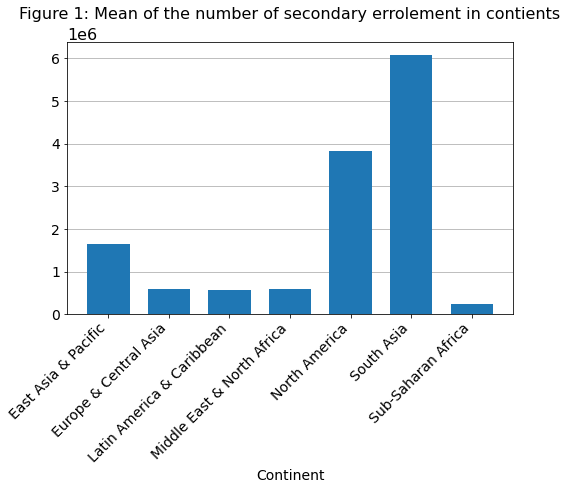

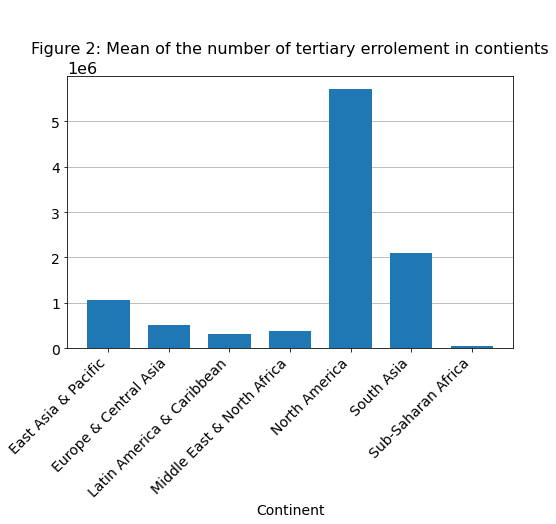

In [13]:
## cette fonction est utilisé pour regrouper entre deux dataframe, pour identifier les continents des pays
def stats_continent(Dataframe, DataFrame_country):
    df_Country_filter = DataFrame_country.filter(['Country Code','Region'])
    DataFrame = Dataframe.fillna(0)
    df_merge = pd.merge(df_Country_filter,DataFrame, on='Country Code')
    DataFrame_Continent = df_merge.groupby(['Region']).mean()
    
    DataFrame_Continent.loc[:,'mean'] = DataFrame_Continent.mean(axis=1)
    return DataFrame_Continent.filter(['mean'])

###par continent:
df_number_totalSecondary = df_number_lowerSecondary.append(df_number_upperSecondary)

df_Continent_secondary = stats_continent(df_number_totalSecondary,df_Country_clean)
df_Continent_tertiary = stats_continent(df_number_tertiary,df_Country_clean)

####################################################################
fig = pl.figure(1, figsize=(8, 5))
pl.grid(zorder=0,axis='y')
pl.bar(df_Continent_secondary.index, df_Continent_secondary['mean'], width =0.7,zorder=3)
pl.xlabel('Continent', fontsize = 14)
pl.ylabel('   ', fontsize = 14)
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.yticks(fontsize = 14)
pl.title('Figure 1: Mean of the number of secondary errolement in contients\n', fontsize= 16)
pl.show()
#################################################################

fig = pl.figure(1, figsize=(8, 5))
pl.grid(zorder=0,axis='y')
pl.bar(df_Continent_tertiary.index, df_Continent_tertiary['mean'], width =0.7,zorder=3)
pl.xlabel('Continent', fontsize = 14)
pl.ylabel('  ', fontsize = 14)
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.yticks(fontsize = 14)
pl.title('\n\nFigure 2: Mean of the number of tertiary errolement in contients\n', fontsize= 16)
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: South Asia has the highest level of education in the secondary level followed by north America, whilst north America take the lead in the tertiary education followed by South Asia**</font></font>

### A-2) Le % pour le niveau d'education secondaire et universitaire en fonction des pays:

#### Exemple: Niveau universitaire

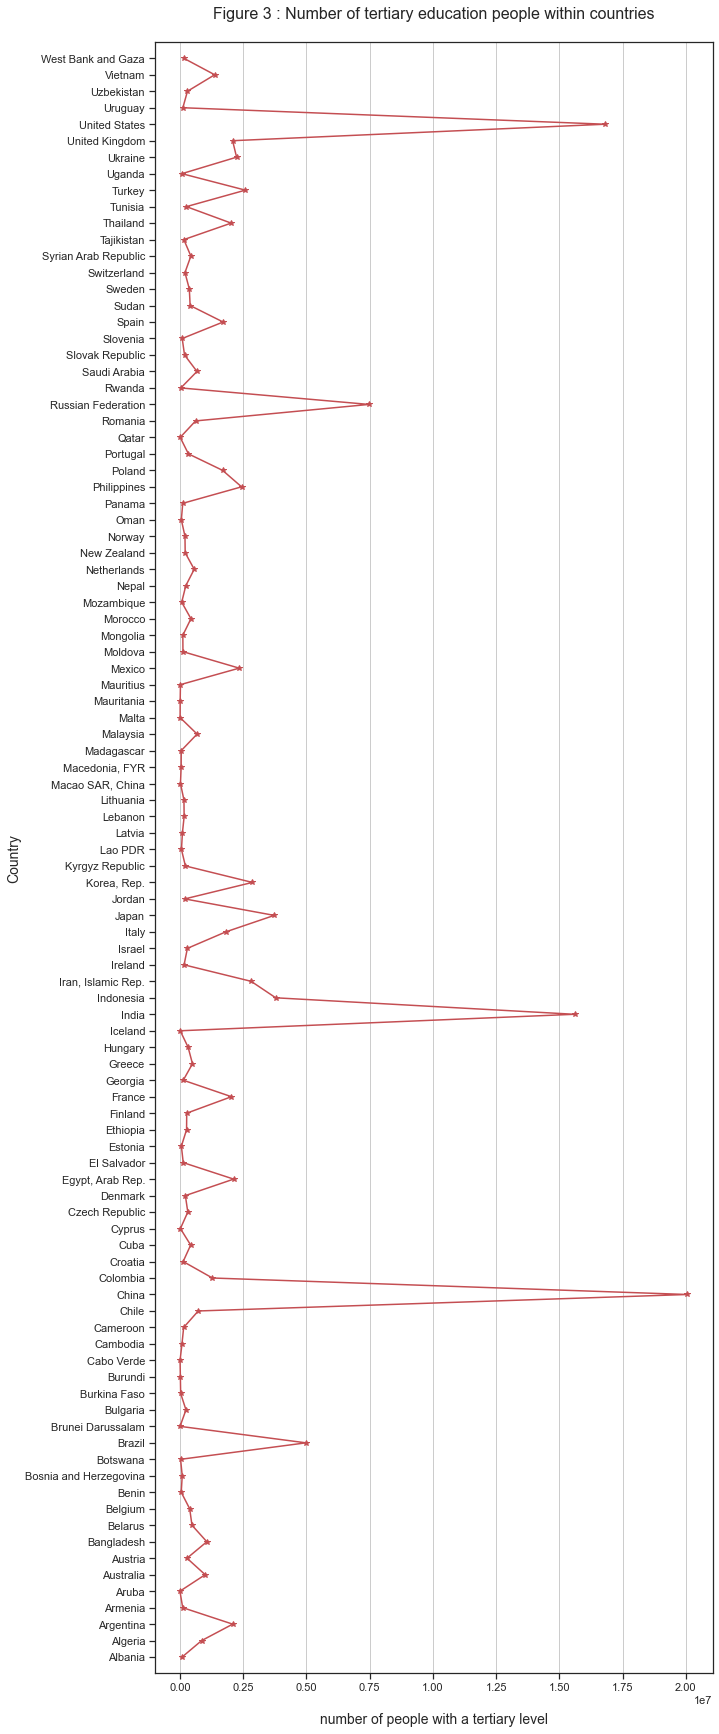

In [14]:
sns.set(style="ticks")
fig, ax1 = pl.subplots(figsize=(10, 30))
ax1.plot(df_number_tertiary_stats['mean'], df_number_tertiary_stats['Country Name'],'-*r',zorder=3)
ax1.set_xlabel('\nnumber of people with a tertiary level', fontsize = 14)
ax1.grid(zorder=0, axis='x')
ax1.margins(y=0.01, tight=True)
pl.title('Figure 3 : Number of tertiary education people within countries\n', fontsize=16)
pl.ylabel('Country',fontsize = 14)
#pl.xticks(ha='right') ## shift the x axe to the right
pl.show()

<font color='darkblue'><font size="4">**La figure précédent ne nous montre pas assez d'information, je compte de faire une analyse sur l'évolution au cours des années. Donc il nous faudra de visualiser les années et éliminer les pays dont le faible évolution en éducation.**</font></font>

<font color='darkblue'><font size="3"> Conditions que j'ai choisi pour filtrer les data: 
<ul>
<li>Niveau d'éducation a augmenté cinq fois durant 10 années</li>
<li>Nombre des gens qui ont un niveau secondaire/universitaire a dépassé le million récemment</li>
<li>Moyenne des gens qui ont un niveau d'éducation est plus grand que 5000</li>
</ul></font></font>

In [15]:
### In this function we'll set the last conditions to filter our data, now we want to see the evolution within 10 years.
## we chose 2004 till 2014, and if the data for a specific country in 2014 is not available we switch to 2002 till 2012
## the values of Nan are replaced by 1, so the calculation of report between the years is not affected.
## at the very end, the values of 1 (initialy Nan) are replaced by the mean of values of its country

def filter_secondary(dataframe_edu):
    liste_delete = np.array([])
    
    ### remplacer les valeurs Nan par 1 et à la fin de cette fonction les remplacer par mean row
    df_edu_fill = dataframe_edu.fillna(1) 
    DataFrame_edu = df_edu_fill.set_index('Country Name') ## les index sont les country name
    
    for j in range(len(DataFrame_edu.index)):
        ### initialement 1 est une Nan, donc on ne la prend pas en consideration, on 
         if DataFrame_edu['2014'].iloc[j] == 1: 
            r = DataFrame_edu['2012'].iloc[j]/DataFrame_edu['2002'].iloc[j]
            if ((DataFrame_edu['mean'].iloc[j]<5000 or r<5) and DataFrame_edu['2012'].iloc[j]<1000000):
                liste_delete = np.append(liste_delete,DataFrame_edu.index[j])
         else:    
            r = DataFrame_edu['2014'].iloc[j]/DataFrame_edu['2004'].iloc[j] 
            if ((DataFrame_edu['mean'].iloc[j]<5000 or r<5) and DataFrame_edu['2014'].iloc[j]<1000000):
                liste_delete = np.append(liste_delete,DataFrame_edu.index[j])
 
    DataFrame_edu_filter = DataFrame_edu.drop(index=liste_delete)
    ####### remplacer les valeurs 1 (qui sont des valeurs Nan) par la valeurs moyenne du pays
    for indx in range(len(DataFrame_edu_filter.index)):
        for col in range(len(DataFrame_edu_filter.columns)):
            if DataFrame_edu_filter.iloc[indx][col] == 1.0:
                DataFrame_edu_filter.iloc[indx,col] = DataFrame_edu_filter.iloc[indx]['mean']
    
    ### pour bien présenter les valeurs on élimine les mean, ecart type, moyen et on définit des sous ligne/colonnes:
    df_drop = DataFrame_edu_filter.filter(items = ['Country Name','2002','2003','2004','2005','2006','2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'])
    df_drop.columns.name = 'Years'

    ## isin let us search for the given column that matchs in another dataframe
    return DataFrame_edu_filter, df_drop

In [16]:
df_number_lowerSecondary_filterPop, df_number_lowerSecondary_plot = filter_secondary(df_number_lowerSecondary_stats)

df_number_upperSecondary_filterPop, df_number_upperSecondary_plot = filter_secondary(df_number_upperSecondary_stats)

df_number_tertiary_filterPop, df_number_tertiary_plot = filter_secondary(df_number_tertiary_stats)

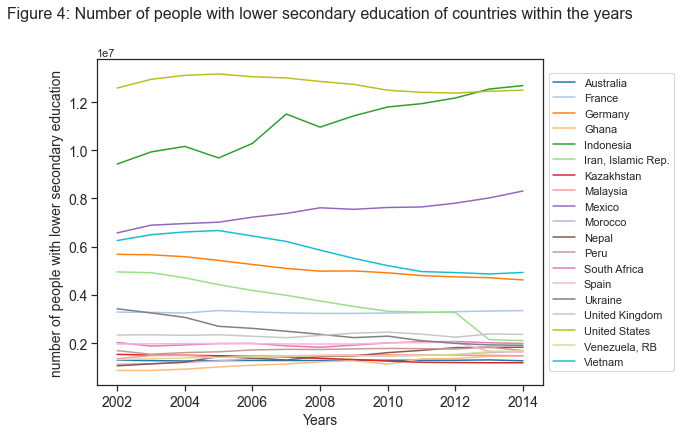

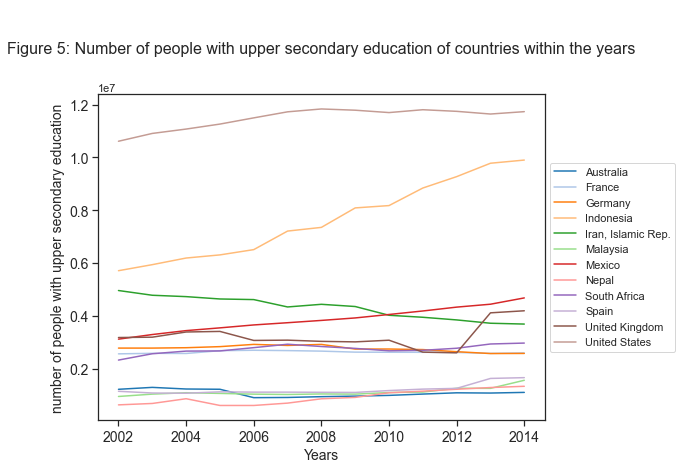

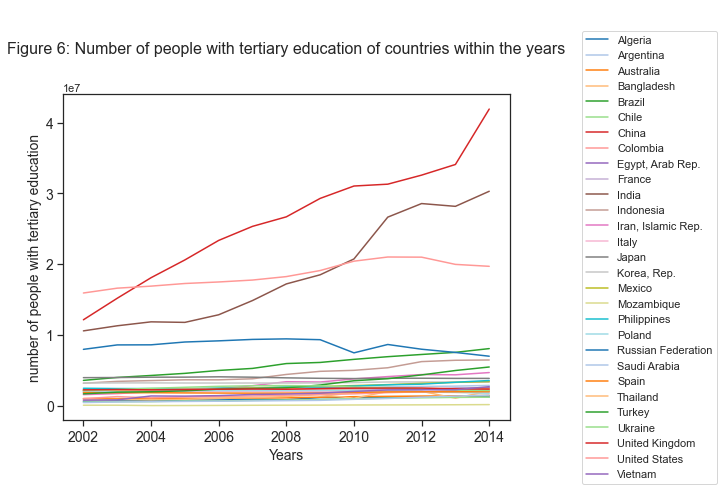

In [17]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
    
df_transposed_LS = df_number_lowerSecondary_plot.T
df_transposed_LS.plot(figsize=(8, 6), fontsize=14,color=tableau20)
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with lower secondary education',fontsize =14)
pl.title('Figure 4: Number of people with lower secondary education of countries within the years\n\n', fontsize =16)
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

df_transposed_US = df_number_upperSecondary_plot.T
df_transposed_US.plot(figsize=(8, 6), fontsize=14,color=tableau20)
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with upper secondary education',fontsize =14)
pl.title('\n\nFigure 5: Number of people with upper secondary education of countries within the years\n\n', fontsize =16)
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

df_transposed_T = df_number_tertiary_plot.T
df_transposed_T.plot(figsize=(8, 6), fontsize=14,color=tableau20)
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with tertiary education',fontsize =14)
pl.title('\n\nFigure 6: Number of people with tertiary education of countries within the years\n\n', fontsize =16)
pl.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
pl.show()

<font color='darkblue'><font size="3">As we can notice: the population with tertiary education is higher than the secondary education, and that is due to the fact that some people are pursuing double major at the time. So they are counted twice.
    
Now for the training session of secondary level, we study the graduated to be soon and the one who graduated already
    
For the session of university level, we study the graduated to be soon and the one who gratuated already.
    
Overall our target is the to study the present market and the future market</font></font>

In [18]:
## For the secondary level:
indx1 = df_number_upperSecondary_plot.index
indx2 = df_number_lowerSecondary_plot.index

pd.DataFrame(index = indx1.intersection(indx2))

""
Country Name
Australia
France
Germany
Indonesia
"Iran, Islamic Rep."
Malaysia
Mexico
Nepal
South Africa


In [19]:
## for the university level
indx1 = df_number_tertiary_plot.index
indx2 = df_number_upperSecondary_plot.index

pd.DataFrame(index = indx1.intersection(indx2))

""
Country Name
Australia
France
Indonesia
"Iran, Islamic Rep."
Mexico
Spain
United Kingdom
United States


<font color='mediumblue'><font size="4">**Conclusion: The list of countries that have the highest number of enrollement in secondary and tertiary education are Australia, France, Indonisia, Iran, Mexico, Spain, United Kingdom and United States.**</font></font>

## B) La possession des ordinateurs
### B-1) La possession des ordinateurs (per 100) en fonction des continents:

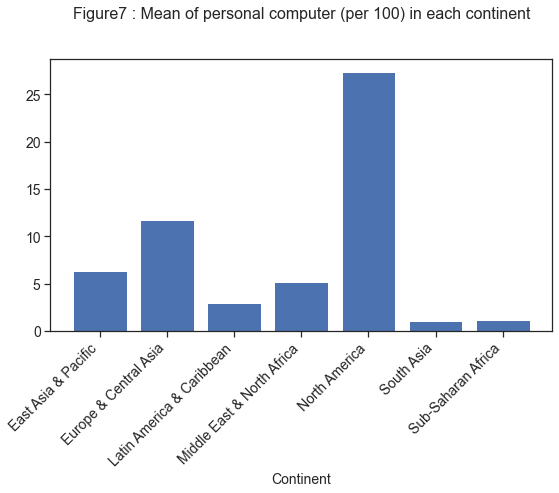

In [20]:
df_continent_computer = stats_continent(df_computer_per100, df_Country_clean)
#counts_computers = pd.Series(df_continent_computer['mean'].tolist(), df_continent_computer.index.tolist()).sort_values(ascending=False)

pl.figure(figsize=(9, 5)) 

pl.bar(df_continent_computer.index, df_continent_computer['mean'])

pl.xlabel('Continent', fontsize = 14)
pl.ylabel('   ', fontsize = 14)
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.yticks(fontsize = 14)
pl.title('Figure7 : Mean of personal computer (per 100) in each continent\n\n', fontsize = 16)
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: North America has 27% of its population with personal computers, and that is the highest % between all the other continents**</font></font>

### B-2) La possession des ordinateurs (en 100) en fonction des pays:
#### B-2.i) Une méthode simple:
<font color='darkblue'><font size="3">on peut tout simplement définir une condition sur la moyenne de chaque pays (là on a choisi 30, c'est à dire on prend on compte les pays dont 30% et plus du population qui ont des computers. 
    (30% du population correspond à la tranche des gens que nous vison --âgé de 15 à 39)</font></font>

In [21]:
df_computer_filter = df_computer_per100_stats[(df_computer_per100_stats['mean']>=30)].set_index('Country Name') ##condition simple

In [22]:
pd.DataFrame(index = df_computer_filter.index) 

""
Country Name
Bahrain
Canada
Denmark
"Hong Kong SAR, China"
"Korea, Rep."
Singapore
Switzerland
United Kingdom


#### B-2.ii) Le calcul de nombre des gens qui ont des computers à partir la population de 15 à 34 ans:
<font color='darkblue'><font size="3">Dans la section ci dessous, on regroupe plusieurs dataframes (âge 15 à 19 ans + âge 20 à 24 + âge 25 à 29 + âge 30 à 34 ans) 
et le dataframe du pourcentage des gens qui ont des computers (on regroupe ensuite la population de cette tranche d'age sur les années 1995, 2000 et 2005). Le nombre des gens(âgé de 15 à 34 ans) qui ont des computers est alors calculé on multipliant la population (en nombre) par le pourcentage des computeurs.</font></font>

In [23]:
def groupby_dataframe(df1,df2,df3,df4,df_computer):
    df_1519 = df1.set_index('Country Name')
    DF_1519 = df_1519.filter(items=['1995','2000','2005','mean'])
    DF_1519.rename(columns={'1995':'1995_1519', '2000':'2000_1519', '2005':'2005_1519', 'mean':'mean_1519'}, inplace=True)
    
    df_2024 = df2.set_index('Country Name')
    DF_2024 = df_2024.filter(items=['1995','2000','2005','mean']) 
    DF_2024.rename(columns={'1995': '1995_2024', '2000':'2000_2024', '2005':'2005_2024', 'mean':'mean_2024'}, inplace=True)
   
    df_2529 = df3.set_index('Country Name')
    DF_2529 = df_2529.filter(items=['1995','2000','2005','mean'])
    DF_2529.rename(columns={'1995': '1995_2529', '2000':'2000_2529', '2005':'2005_2529', 'mean':'mean_2529'}, inplace=True)
    
    df_3034 = df4.set_index('Country Name')
    DF_3034 = df_3034.filter(items=['1995','2000','2005','mean'])
    DF_3034.rename(columns={'1995': '1995_3034', '2000':'2000_3034', '2005':'2005_3034', 'mean':'mean_3034'}, inplace=True)
    
    #df_liste = pd.contact([Dataframe_1519, Dataframe_2024, Dataframe_2529, Dataframe_3034], ignore_index=True)
    DF_1524 = pd.concat([DF_1519,DF_2024], ignore_index=False,axis=1)   
    DF_1529 = pd.concat([DF_1524, DF_2529], ignore_index=False,axis=1)
    DF_1534 = pd.concat([DF_1529, DF_3034], ignore_index=False,axis=1)

    DataFrame = df_computer.set_index('Country Name')
    DF_computer = DataFrame.filter(items=['1995','2000','2005','mean'])
    Result = pd.concat([DF_computer, DF_1534], ignore_index=False,axis=1)
    #Result.dropna(thresh=20)
    return Result

def percentage_population(df):
    Dataframe = df.copy()
    Dataframe_filter = Dataframe.filter(items=['1995','2000','2005'])
    Dataframe_filter["sum_population95"] = df['1995_1519']+df['1995_2024']+df['1995_2529'] + df['1995_3034']
    Dataframe_filter["sum_population00"] = df['2000_1519']+df['2000_2024']+df['2000_2529'] + df['2000_3034']
    Dataframe_filter["sum_population05"] = df['2005_1519']+df['2005_2024']+df['2005_2529'] + df['2005_3034']
    
    Dataframe_filter["comp_popu95"] = Dataframe_filter['sum_population95']*Dataframe_filter['1995']
    Dataframe_filter["comp_popu00"] = Dataframe_filter['sum_population00']*Dataframe_filter['2000']
    Dataframe_filter["comp_popu05"] = Dataframe_filter['sum_population05']*Dataframe_filter['2005']
    Df_population = Dataframe_filter.filter(items =['comp_popu95','comp_popu00','comp_popu05'])
    return Dataframe_filter, Df_population

In [24]:
df_population_computer = groupby_dataframe(df_population15_19_stats,df_population20_24_stats, df_population25_29_stats, df_population30_34_stats, df_computer_per100_stats)
df_population_computer_filter = df_population_computer.dropna(thresh=20)
df_number_computer_population, df_number_computer_population_plot = percentage_population(df_population_computer_filter)

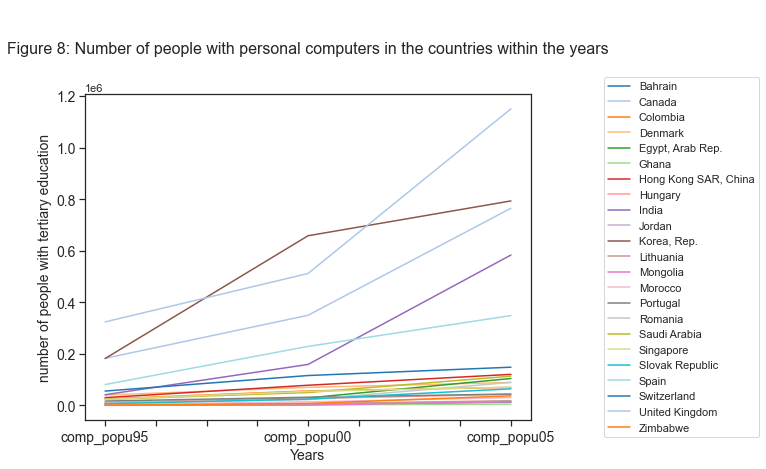

In [25]:
df_transposed_T = df_number_computer_population_plot.T ## transpose du dataframe pour avoir les counrty dans l'axes des abscisses
df_transposed_T.plot(figsize=(8, 6), fontsize=14,color=tableau20)
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with tertiary education',fontsize =14)
pl.title('\n\nFigure 8: Number of people with personal computers in the countries within the years\n\n', fontsize =16)
pl.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
pl.show()


<font color='darkblue'><font size="3.5">Donc maintenant, on applique la condition qui est: nombres des gens > 100000. On montre les resultats dans le tableau Dataframe avec les valeurs requis sont marqué en rouge</font></font>

In [26]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val >100000 else 'black'
    return 'color: %s' % color

In [27]:
df_number_computer_population_plot.style.applymap(color_negative_red)

,comp_popu95,comp_popu00,comp_popu05
Bahrain,1188.201799,3667.849377,12632.707775
Canada,182617.458418,349631.931669,764900.633403
Colombia,25092.241338,56243.443278,69906.135628
Denmark,40213.416627,70000.035592,89048.768369
"Egypt, Arab Rep.",8312.298915,29076.793950,104422.436179
Ghana,726.212860,2295.454021,4972.981244
"Hong Kong SAR, China",30133.462490,78211.171681,120453.160750
Hungary,11665.385432,26404.344318,43019.646267
India,41438.103722,158898.471261,583428.438345
Jordan,1437.215954,6258.028357,14594.562716


<font color='mediumblue'><font size="4">**Conclusion: The countries that have a high population and percentage of possessing personal computers are: Canada, India, Korea-rep, Spain, Switzerland, United Kingdom. And the countries that have a high tendancy are Egypt, China and Saudi Arabia**</font></font>

## C) L'accés au Internet
### C-1) L'accés au Internet (par 100) en fonction des continents:

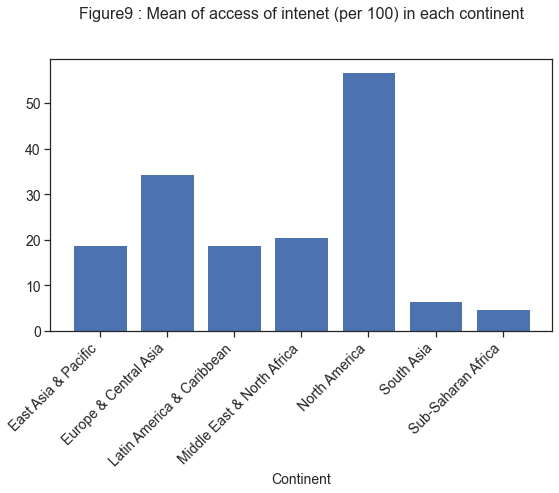

In [28]:
df_continent_internet = stats_continent(df_internet_per100, df_Country_clean)
#counts_computers = pd.Series(df_continent_computer['mean'].tolist(), df_continent_computer.index.tolist()).sort_values(ascending=False)

pl.figure(figsize=(9, 5)) 
pl.bar(df_continent_internet.index, df_continent_internet['mean'])

pl.xlabel('Continent', fontsize = 14)
pl.ylabel('   ', fontsize = 14)
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.yticks(fontsize = 14)
pl.title('Figure9 : Mean of access of intenet (per 100) in each continent\n\n', fontsize = 16)
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: North America has more than 50% of its population with access of intenet.**</font></font>

### C-2) L'accés au internet (par 100) en fonction des pays:

In [29]:
df_internet_filter = df_internet_per100_stats[(df_internet_per100_stats['mean']>=60)].set_index('Country Name') ##condition simple

In [30]:
pd.DataFrame(index = df_internet_filter.index, data= df_internet_filter['2015'])

,2015
Country Name,
Australia,84.560519
Bermuda,98.323610
Canada,88.470000
Denmark,96.330500
Faroe Islands,94.200000
Finland,86.422133
Iceland,98.200000
"Korea, Rep.",89.648631
Liechtenstein,96.641195


<font color='mediumblue'><font size="4">**Conclusion: The previous list presents the countries for which have higher than 50% of its people with access for internet**</font></font>

## D) GDP de chaque habitant
### D-1) GDP de chaque habitans en fonction des continents:

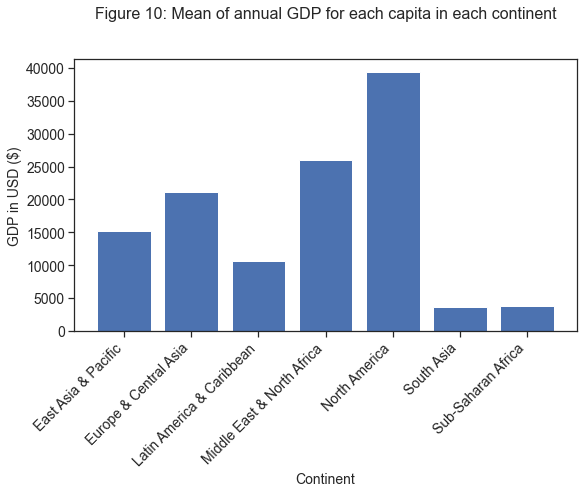

In [31]:
df_GDP_capita_continent = stats_continent(df_GDP_capita_stats, df_Country_clean)

pl.figure(figsize=(9, 5)) 
pl.bar(df_GDP_capita_continent.index, df_GDP_capita_continent['mean'])
pl.xlabel('Continent', fontsize = 14)
pl.ylabel('GDP in USD ($)', fontsize = 14)
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.yticks(fontsize = 14)
pl.title('Figure 10: Mean of annual GDP for each capita in each continent\n\n', fontsize = 16)
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: North Americ has the highest income of GDP per individual, whilst the Europe & Cental Asia and Middle East & North Africa has almost the same income of GDP per individual.**</font></font>

### D-2) GDP en 'usd' des habitants en fonction des pays:
<font color='darkblue'><font size="3">Dans cette partie, on choisi une maniére simple pour déterminer les pays où les habitants ont un GDP élevé et parsuite peuvent se financer les frais des sessions de formation.</font></font>

In [32]:
max_GDP = df_GDP_capita_stats['mean'].max()/3. ### on fixe une valeur de référence. dans ce cas le tiers du valeur maximum
df_GDP_capita_filter = df_GDP_capita_stats[(df_GDP_capita_stats['mean']>=max_GDP)].set_index('Country Name')

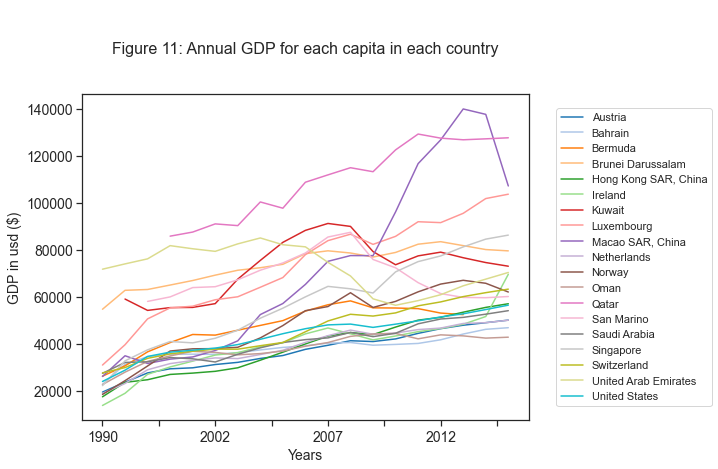

In [33]:
df_GDP_capita_plot = df_GDP_capita_filter.drop(columns=['Country Code', 'mean','median','ecarttype'])
df_transposed_T = df_GDP_capita_plot.T
df_transposed_T.plot(figsize=(8, 6), fontsize=14,color=tableau20)
pl.xlabel('Years',fontsize =14)
pl.ylabel('GDP in usd ($)',fontsize =14)
pl.title('\n\nFigure 11: Annual GDP for each capita in each country\n\n', fontsize =16)
pl.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
#pl.xticks([1990, 2013])
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: Qatar has he highest income of GPD per individual, followed by China and Luxembourg.**</font></font>

## E) La population totale
### E-1) La population total du pays dans chaque continent:

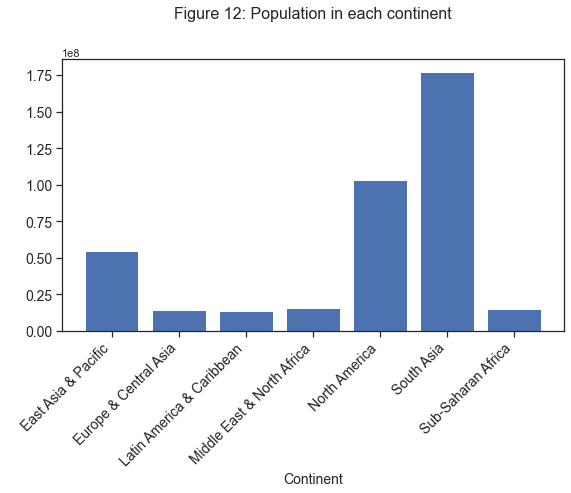

In [34]:
df_total_population_continent = stats_continent(df_total_population_stats, df_Country_clean)

pl.figure(figsize=(9, 5)) 
pl.bar(df_total_population_continent.index, df_total_population_continent['mean'])
pl.xlabel('Continent', fontsize = 14)
pl.ylabel(' ', fontsize = 14)
pl.xticks(rotation=45,ha='right', fontsize = 14)
pl.yticks(fontsize = 14)
pl.title('Figure 12: Population in each continent\n\n', fontsize = 16)
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: South Asia has the highest population up to 1.75 octillion**</font></font>

### E-2) La population total du pays:

In [35]:
df_total_population_filter, df_total_population_plot = filter_secondary(df_total_population_stats)

In [36]:
### In this function we'll set the last conditions to filter our data, now we want to see the evolution within 10 years.
## we chose 2005 till 2015, and if the data for a specific country in 2015 is not available so we switch to 2003 till 2013
## the values of Nan are replaced by 1, so the calculation of report between the years is not affected.
## at the very end, the values of 1 (initialy were Nan) are replaced by the mean of values of its country

def filter_population(dataframe):
    liste_delete = np.array([])
    
    ### remplacer les valeurs Nan par 1 et à la fin de cette fonction les remplacer par moyenne ligne
    df_fill = dataframe.fillna(1) 
    DataFrame = df_fill.set_index('Country Name') ## les index sont les country name
    
    for j in range(len(DataFrame.index)):
        ### initialement 1 est une Nan, donc on ne la prend pas en consideration, on 
         if DataFrame['2015'].iloc[j] == 1: 
            r = DataFrame['2013'].iloc[j]/DataFrame['2003'].iloc[j]
            if ((DataFrame['mean'].iloc[j]<50000 or r<50) and DataFrame['2013'].iloc[j]<100000000):
            #if ((DataFrame['mean'].iloc[j]<50000 or r<5) and DataFrame['2013'].iloc[j]<10000000): ## population age 15 24   
                liste_delete = np.append(liste_delete,DataFrame.index[j])
         else:    
            r = DataFrame['2015'].iloc[j]/DataFrame['2005'].iloc[j] 
            if ((DataFrame['mean'].iloc[j]<50000 or r<50) and DataFrame['2015'].iloc[j]<100000000):
            #if ((DataFrame['mean'].iloc[j]<50000 or r<5) and DataFrame['2015'].iloc[j]<10000000): ## population age 15 24
                
                liste_delete = np.append(liste_delete,DataFrame.index[j])
 
    DataFrame_filter = DataFrame.drop(index=liste_delete)
    ####### remplacer les valeurs 1 (qui sont des valeurs Nan) par la valeurs moyenne du pays
    for indx in range(len(DataFrame_filter.index)):
        for col in range(len(DataFrame_filter.columns)):
            if DataFrame_filter.iloc[indx][col] == 1.0:
                DataFrame_filter.iloc[indx,col] = DataFrame_filter.iloc[indx]['mean']
    
    ### pour bien présenter les valeurs on élimine les mean, ecart type, moyen et on définit des sous ligne/colonnes:
    df_drop = DataFrame_filter.drop(columns = ['Country Code','1980','1985','2001','2002','2003','2004','2006','2007','2008','2009','2011','2012','mean','median','ecarttype'])
    df_drop.columns.name = 'Years'

    ## isin let us search for the given column that matchs in another dataframe
    return DataFrame_filter, df_drop
df_total_population_filter,df_total_population_plot = filter_population(df_total_population_stats)

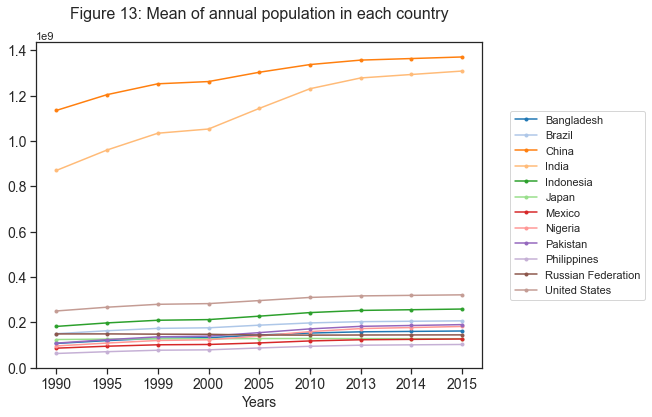

In [37]:
df_transposed_T = df_total_population_plot.T

df_transposed_T.plot(figsize=(8, 6), fontsize=14,color=tableau20,style='.-')
#pl.hist(df_total_population_plot.index, df_total_population_plot['2015'])
pl.xlabel('Years',fontsize =14)
pl.ylabel('',fontsize =14)
pl.title('Figure 13: Mean of annual population in each country\n', fontsize =16)
pl.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
#pl.xticks([1990, 2013])
pl.show()

<font color='mediumblue'><font size="4">**Conclusion: China followed by India has the highest population between all the other countries. United States come in third.**</font></font>

<font color='black'><font size="4">**General Conclusion:**</font></font> 
<font color='black'><font size="3">  
    <ul>
 <li>US has high education, GDP per individual and population, so it is a good target for our future expansion. </li>  
    
<li>UK has three criteria, education, access to internet and computers, and Australia has high level of education and access to internet, so it may be a risk to expand in those two countries because of its population and the GDP, but since their mother language is the same as US, so it wont be high risk to expand. </li>

    
<li>China has computers, population and GDP but no indicator of the access to internet or over the education => further study is needed.</li>
    
<li>Spain has education and computers but not population or GDP, so there is no need to expand there. </li>
    
<li>Indonidia has high level of education and population, but because of the lack of computers and the access to the internet and GDP => further study & high risk.   </li>
    
    
<li>Switzerland has three criteria, computers, access to internet and GDP, but no indication over the eduaction => high risk</li>
    
<li>Bahrain and Saudi Arabia has two criteria computers and GDP, it is a high risk to expand in these countries.</li>
     </ul>
    </font></font>

<font color='darkblue'><font size="3">A further study to the education in China within years:</font></font>

Text(0.5, 1.0, '\n\nFigure 14: Number of people with lower secondary education of countries within the years\n\n')

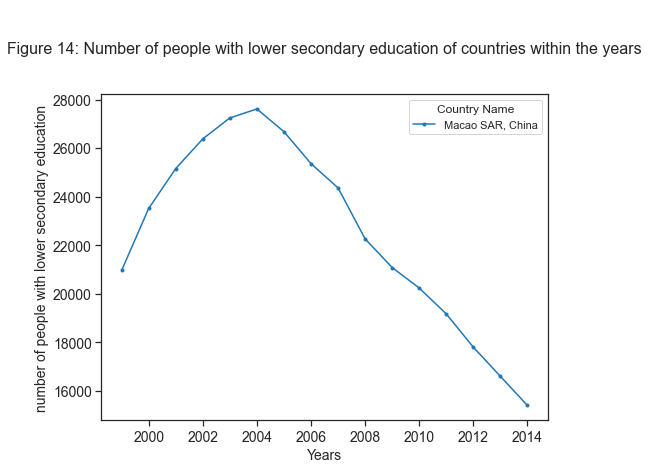

In [38]:
China_education_lowerSecondary=(df_number_lowerSecondary_stats[(df_number_lowerSecondary_stats['Country Name'])=='Macao SAR, China']).set_index('Country Name')
China_education_TLS = China_education_lowerSecondary.drop(columns=['Country Code','mean','median','ecarttype']).T
China_education_TLS.plot(figsize=(8, 6), fontsize=14,color=tableau20,style='.-')
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with lower secondary education',fontsize =14)
pl.title('\n\nFigure 14: Number of people with lower secondary education of countries within the years\n\n', fontsize =16)

Text(0.5, 1.0, '\n\nFigure 15: Number of people with upper secondary education of countries within the years\n\n')

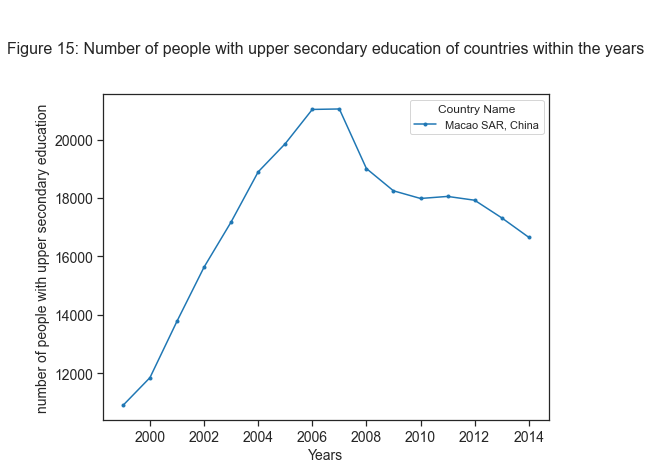

In [39]:
China_education_upperSecondary=(df_number_upperSecondary_stats[(df_number_upperSecondary_stats['Country Name'])=='Macao SAR, China']).set_index('Country Name')
China_education_TUS = China_education_upperSecondary.drop(columns=['Country Code','mean','median','ecarttype']).T
China_education_TUS.plot(figsize=(8, 6), fontsize=14,color=tableau20,style='.-')
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with upper secondary education',fontsize =14)
pl.title('\n\nFigure 15: Number of people with upper secondary education of countries within the years\n\n', fontsize =16)

Text(0.5, 1.0, '\n\nFigure 16: Number of people with tertiary education of countries within the years\n\n')

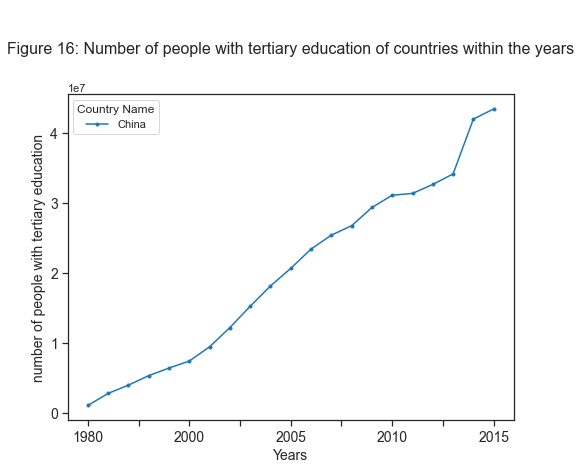

In [40]:
China_education_tertiary=(df_number_tertiary_stats[(df_number_tertiary_stats['Country Name'])=='China']).set_index('Country Name')
China_education_TT = China_education_tertiary.drop(columns=['Country Code','mean','median','ecarttype']).T
China_education_TT.plot(figsize=(8, 6), fontsize=14,color=tableau20,style='.-')
pl.xlabel('Years',fontsize =14)
pl.ylabel('number of people with tertiary education',fontsize =14)
pl.title('\n\nFigure 16: Number of people with tertiary education of countries within the years\n\n', fontsize =16)